## What is time Series

- A time series is a sequence of data measured over regular time intervals.
  E.g.: weather data over 5 years
- By analysing a time series, we can identify the pattern in the data and
  develop a forecasting model
- Python provides a lot of functionality to analize a times series

### Python Libraries for Time Series Analysis

- Python has a lot of libraries for time series analysis
- Some of those libraries are used in Machine Learning and hence are out of the
  scope of this Course
- We'll be using the following libraries for time series analysis
  - Pandas
  - NumPy
  - datetime
  - Matplotlib

### How to get a Time Series?

- As mentioned earlier, a time series is just a set of values measured over
  regular intervals of time
- Generally, any dataset with values measured over time can be treated as a
  time series
- Examples of such dataset could include, but not limited to:
  - Stocks data
  - Weather data
  - Patient health evolution data
- In Python, the data type of dates and times in a time series is either
  datetime or Timestamp
- In this course, we'll see how can we download a time series and how can we
  convert a dataset with values measured over time into a time series

### Getting Stock Data using yfinance

- yfinance is a Python library that allows downloading stock data from Yahoo
  Finance for specified period of time as a time series
- You can also download a dataset from their website directly [here](https://finance.yahoo.com)
- To use yfinance Python library, we first have to install it via the following commad:
  - pip install yfinance
- Once the library has been installed, we can import it into the Jupyter Notebook
- yfinance is commonly imported as `yf`

In [2]:
import yfinance as yf
import pandas as pd

- After importing the library, we can download stock data for different
  companies using the `.download()` method
- We pass a start and an end date in the format **YYYY-MM-DD**
- If there is no data available for a certain date, that date would be skipped
- In the given example, we downloaded the stocks data for Apple (abbreviated as
  AAPL in Yahoo Finance) from 1st jan, 2023 to 31st jan, 2023

In [4]:
df = yf.download('AAPL', start='2023-01-01', end='2023-01-31')
display(type(df))
display(df.head(10))

[*********************100%%**********************]  1 of 1 completed


pandas.core.frame.DataFrame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904625,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412231,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511902,63896200
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.246185,69458900
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.166931,71379600
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.504333,57809700


- As you can see, the values of the index column (Date) of the dataset in the
  previous slide have the type Timestamp, indicating that it is a Python time series

In [5]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

### Converting a Dataset to Time Series

- Time Series data is generally stored as csv file having a column
  representing date or tima or both
- It can be imported in Python using the `.read_csv()` function of Pandas library
- We can use the `to_datetime()` function of the Pandas library to convert the
  values of the date column from string to Timestamp

- Consider the following time series. The type of each value of **Date**
  (index)is a string as shown bellow

In [14]:
import os
import pandas as pd

data_csv = os.path.abspath("data_df.csv")

with open(data_csv) as file:
    df = pd.read_csv(file)
    df.set_index('Date', inplace=True)
    display(df)

,values
Date,
1991-07-01,37.723199
1991-08-01,41.071400
1991-10-01,43.973199
1991-11-01,45.758900
1992-04-01,51.116103
...,...
2007-10-01,552.250004
2007-11-01,673.571396
2008-02-01,486.571407


In [15]:
type(df.index[0])

str

- To be able to use the time series functionality available in Python, we have
  to convert the values of **Date** to Timestamp
- This can be done using the `to_datetime()` function of Pandas

In [18]:
df.index = pd.to_datetime(df.index)
display(df)
display(type(df.index))
display(type(df.index[0]))

,values
Date,
1991-07-01,37.723199
1991-08-01,41.071400
1991-10-01,43.973199
1991-11-01,45.758900
1992-04-01,51.116103
...,...
2007-10-01,552.250004
2007-11-01,673.571396
2008-02-01,486.571407


pandas.core.indexes.datetimes.DatetimeIndex

pandas._libs.tslibs.timestamps.Timestamp

- In previous example, the data in the **Date** column was in a format that
  Pandas could easily convert. However, this isn't always the case
- Consider the following dataframe for example, **Date** values are strings

In [19]:
import os
import pandas as pd

ETH_1h_csv = os.path.abspath("ETH_1h.csv")

with open(ETH_1h_csv) as file:
    df = pd.read_csv(file)
    df.set_index('Date', inplace=True)
    display(df)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...
2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99


In [21]:
df.index = pd.to_datetime(df.index)

C:\Users\FIA\AppData\Local\Temp\ipykernel_29628\3150677299.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


DateParseError: Unknown datetime string format, unable to parse: 2020-03-13 08-PM, at position 0

- The error arises because Pandas doesn't know the format of the string values
- We can use the _format_ parameter to resolve this issue
- More about it [here](https://docs.python.org/3/library/datetime.html#strftime-and-srtptime-behavior)

In [22]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d %I-%p')
display(df)
display(type(df.index))
display(type(df.index[0]))

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99


pandas.core.indexes.datetimes.DatetimeIndex

pandas._libs.tslibs.timestamps.Timestamp

### Working with Time Series

- In this section we'll learn to use Pandas time series functionality
- We'll use the following time series containing stocks data for Apple (abbreviated as
  AAPL in Yahoo Finance) from 1st jan, 2023 to 31st dez, 2023
- Remember that the _end_ parameter of the yfinance `.download()` is excluding

In [28]:
df = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
display(type(df))
display(df.head(10))

[*********************100%%**********************]  1 of 1 completed


pandas.core.frame.DataFrame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904625,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412216,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937302,70790800
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511902,63896200
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.246170,69458900
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.166916,71379600
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.504333,57809700


#### .day_name()

- The 1st thing you might have noticed is that there in no data available for
  1st and 2nd jan, 2023
- Let's see whether these two were business days or not
- We'll use the `.day_name()` function to find out what day was on 1st jan
- Remember that this function can only be applied on a value of time, datetime
  or Timestamp
- 1st jan, 2023 was a Sunday and 2nd jan, 2023 was a Monday...

In [29]:
jan1 = pd.to_datetime('2023, 1, 1')
jan1.day_name()

'Sunday'

#### Max/Min Date

- Sometimes, our timeseries data might not be in order
- In such case, we would be interested in what is the maximum and the minimum
  datetime (or Timestamp) in the dataset
- This can be done using the `.max()` and `.min()` functions

In [30]:
df.index.max()

Timestamp('2023-12-29 00:00:00')

In [31]:
df.index.min()

Timestamp('2023-01-03 00:00:00')

#### datetime Range

- Next, let's see what is the datetime range in our dataset
- This is as simple as subtracting minimum value of the datetime (Timestamp)
  from its maximum value
- Note that this will only work if you have datetime or Timestamp values in your
  dataset and not strings

In [32]:
timePeriod = df.index.max() - df.index.min()
timePeriod

Timedelta('360 days 00:00:00')

#### Time-based Indexing

- Pandas provides time-based indexing for time series, e.g.: accessing data
  using datetime
- We can select data on specific dates and times using `loc`
- In the given example, we get data on 9th Jan, 2023

In [37]:
df.loc['2023-01-09']

Open         1.304700e+02
High         1.334100e+02
Low          1.298900e+02
Close        1.301500e+02
Adj Close    1.289373e+02
Volume       7.079080e+07
Name: 2023-01-09 00:00:00, dtype: float64

- Let's select multiple dates using slicing with `.loc`

In [38]:
df.loc['2023-07-01':'2023-07-09']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,191.221954,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,190.099243,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,190.576141,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,189.453400,46778000


- We can also partially match a datetime using `loc`
- In the given example, we get the data from the time series for the month of
  February only
- We pass the string "2023-02" to get the data of February

In [39]:
df.loc['2023-02']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,143.970001,146.610001,141.320007,145.429993,144.074921,77663600
2023-02-02,148.899994,151.179993,148.169998,150.820007,149.414719,118339000
2023-02-03,148.029999,157.380005,147.830002,154.500000,153.060425,154357300
2023-02-06,152.570007,153.100006,150.779999,151.729996,150.316238,69858300
2023-02-07,150.639999,155.229996,150.639999,154.649994,153.209000,83322600
2023-02-08,153.880005,154.580002,151.169998,151.919998,150.504456,64120100
2023-02-09,153.779999,154.330002,150.419998,150.869995,149.464233,56007100
2023-02-10,149.460007,151.339996,149.220001,151.009995,149.831360,57450700
2023-02-13,150.949997,154.259995,150.919998,153.850006,152.649185,62199000


### Visualizing a Time Series

- Using Matplotlib and Seaborn, we can visualize a time Series
- Let's see how the stock prices of Apple varied over the last 5 years
- We'll begin downloading the stock data from this period

In [40]:
df = yf.download('AAPL', start='2019-01-01', end='2023-12-31')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.750088,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,33.989902,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.440907,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.362015,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.036133,164101200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320206,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700


In [41]:
df.index.min()

Timestamp('2019-01-02 00:00:00')

In [42]:
df.index.max()

Timestamp('2023-12-29 00:00:00')

- Now, let's use the `plot()` function of the matplotlib.pyplot to plot the
  **Adj Close** time series
- We can see that the stock prices of Apple have increased drastically since 2019

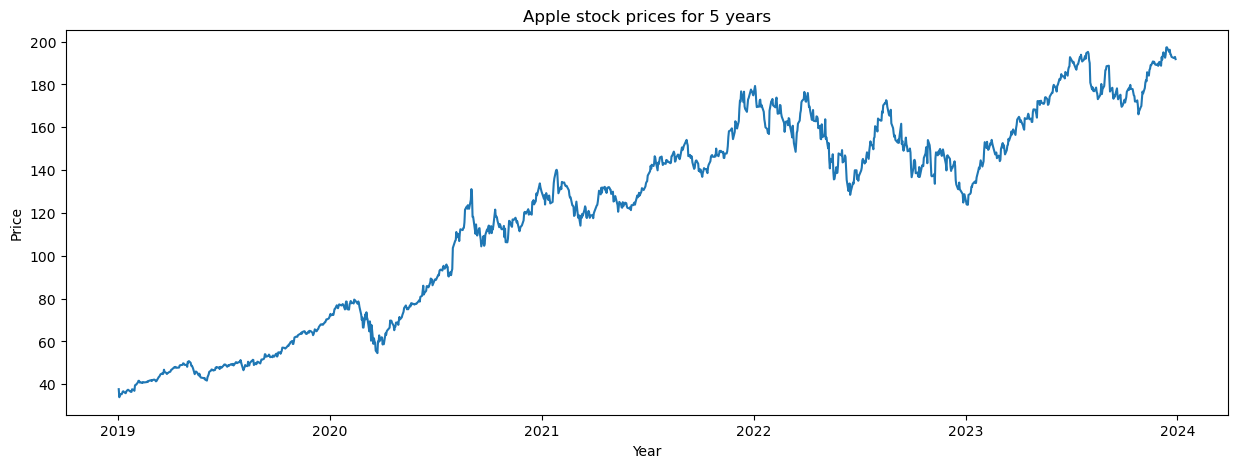

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.title('Apple stock prices for 5 years')
plt.xlabel('Year')
plt.ylabel('Price')

plt.plot(df['Adj Close'])

- We can also see how the Apple stock prices have varied over 2022 alone
- We use the time-based indexing to get the year 2022 from dataset
- We them plot the **Adj Close** time series

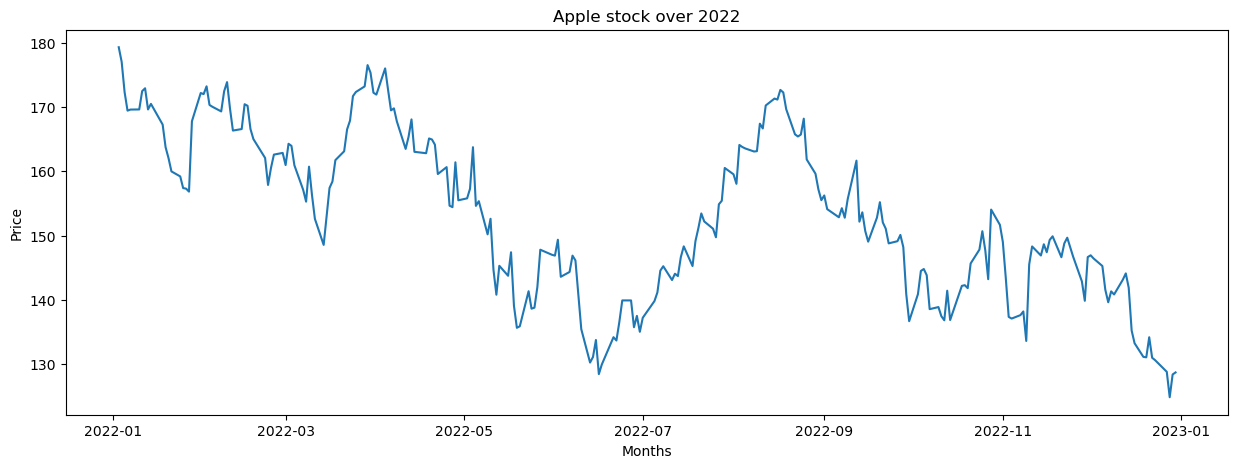

In [45]:
plt.figure(figsize=(15, 5))
plt.title('Apple stock over 2022')
plt.xlabel('Months')
plt.ylabel('Price')

plt.plot(df.loc['2022']['Adj Close'])